<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [408]:
!pip install pandas
!pip install psycopg2
!pip install python-dotenv

In [409]:
import pandas as pd
import psycopg2
import os

from pathlib import Path
from dotenv import load_dotenv

load_dotenv()
env_path = Path('.')/'.env'
load_dotenv(dotenv_path=env_path)

True

In [410]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [411]:
connection = psycopg2.connect(
    dbname=os.getenv("DBNAME"),
    user=os.getenv("USER"),
    host=os.getenv("HOST"),
    password=os.getenv("PASSWORD"),
    port=os.getenv("PORT")
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [412]:
# текст запроса
query_3_1 = f'''
SELECT COUNT(*) AS "vacancies total"
FROM public.vacancies
'''

In [413]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
display(df)

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\3515521326.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,vacancies total
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [414]:
# текст запроса
query_3_2 = f'''
SELECT COUNT(*)  AS "employers total"
FROM public.employers
'''

In [415]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_3_2)

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\3739032669.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,employers total
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [416]:
# текст запроса
query_3_3 = f'''
SELECT COUNT(*) AS "areas total"
FROM public.areas
'''

In [417]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_3_3)

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\3655563261.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


,areas total
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [418]:
# текст запроса
query_3_4 = f'''
SELECT COUNT(*) AS "industries total"
FROM public.industries
'''

In [419]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_3_4)

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\1664686941.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,industries total
0,294


***

выводы по предварительному анализу данных

**Выводы:** Предварительно можно сказать что колличество вакансий примерно в два раза превышает колличество работодателей на выборке. То есть в среднем можем считать белее двух вакансий (2.09) на работодателя Выборка представлена по 1362 населенным пунктам и 294 сферам деятельности.



# Юнит 4. Детальный анализ вакансий

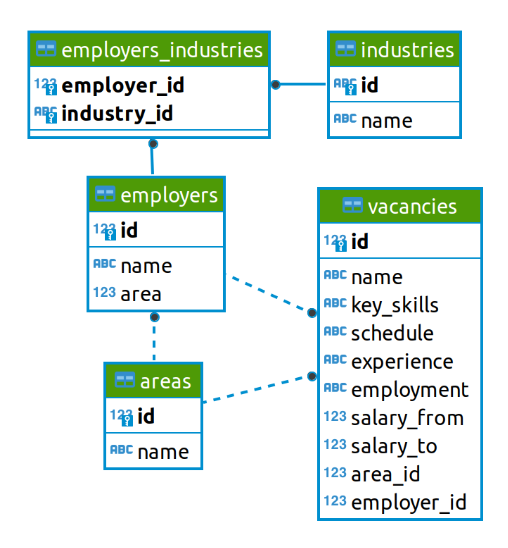

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [420]:
# текст запроса
query_4_1 = f'''
SELECT a.name AS city_name,
    COUNT(*) AS vacancies_count
FROM public.vacancies AS v
LEFT JOIN public.areas AS a on a.id = v.area_id
GROUP BY a.id
ORDER BY 2 desc 
'''

In [421]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
display(df_4_1[0:5])

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\2449796283.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,city_name,vacancies_count
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [422]:
# текст запроса
query_4_2 = f'''
SELECT count(*) AS vacancies_count
FROM public.vacancies
WHERE (salary_from IS NOT NULL) OR (salary_to IS NOT NULL) 
'''

In [423]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
display(df_4_2)

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\3964404419.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


,vacancies_count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [424]:
# текст запроса
query_4_3 = f'''
SELECT  'from' AS salary_border,
	ROUND(AVG(salary_from)) AS mean_salary
FROM public.vacancies

UNION

SELECT  'to',
	ROUND(AVG(salary_to))
FROM public.vacancies
'''

In [425]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
display(df_4_3)


C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\4258899071.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,salary_border,mean_salary
0,from,71065.0
1,to,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [426]:
# текст запроса
query_4_4 = f'''
SELECT  schedule, 
	employment,
	count(*) AS vacancies_count
FROM public.vacancies
GROUP BY schedule, employment 
ORDER BY 3 DESC 
'''

In [427]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
display(df_4_4.iloc[1])

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\972204354.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,vacancies_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [428]:
# текст запроса
query_4_5 = f'''
SELECT  experience
FROM public.vacancies
GROUP BY experience
ORDER BY COUNT(*)
'''

In [429]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5)
connection.close()

C:\Users\zhigu\AppData\Local\Temp\ipykernel_20668\717938491.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

выводы по детальному анализу вакансий

**Выводы:** 
- Логично, что наибольшее количество вакансий располагается в крупных городах. Причем в Москве количество вакансий в минимум в два раза больше, чем в остальных городах, включенных в выборку. Это можно объяснить как большим населением Москвы, так и тем, что москва является наиболее крупным из рассматриваемых региональных центров.
- Для более чем половины вакансий не указан диапазон зарплат, что можно объяснить желанием работодателя не прогадать и не предложить больше, чем минимум на который согласен соискатель.
- Наибольшее количество вакансий предусматривает полный рабочий день и полную занятость (35367), но значительная доля ваканчий (7802) предусматривает и удаленную работу при полной занятости.
- Можно сказать что наибольшее количоство вакансий предусматривает опыт от  1 года до 3 лет. На втором месте от 3 лет до 6 лет, на третьем - без опыта, на четвертом - от 6 лет. Такое распределение можно объяснить желанием работадателя получить получить уже готового специалиста (не без опыта), но не требующего большой зарплаты (с опытом более 6 лет). 


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [431]:
# текст запроса

In [432]:
# результат запроса

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [433]:
# текст запроса

In [434]:
# результат запроса

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [435]:
# текст запроса

In [436]:
# результат запроса

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [437]:
# текст запроса

In [438]:
# результат запроса

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [439]:
# текст запроса

In [440]:
# результат запроса

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [441]:
# текст запроса

In [442]:
# результат запроса

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [443]:
# код для получения списка городов-милионников

In [444]:
# текст запроса

In [445]:
# результат запроса

***

In [446]:
# выводы по анализу работодателей

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [447]:
# текст запроса

In [448]:
# результат запроса

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [449]:
# текст запроса

In [450]:
# результат запроса

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [451]:
# текст запроса

In [452]:
# результат запроса

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [453]:
# текст запроса

In [454]:
# результат запроса

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [455]:
# текст запроса

In [456]:
# результат запроса

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [457]:
# текст запроса

In [458]:
# результат запроса

***

In [459]:
# выводы по предметному анализу

# Общий вывод по проекту

In [460]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования